In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)
sns.set(style="white", color_codes=True)

pd.set_option('display.max_rows' , 500)

In [2]:
#Load Data
train_house_df = pd.read_csv('train.csv/train.csv')
test_house_df = pd.read_csv('test.csv/test.csv')
macro_df = pd.read_csv('macro.csv/macro.csv')

In [3]:
label_df = train_house_df['price_doc']

feature_df = train_house_df.drop(['price_doc'], axis=1 )

merge_df = feature_df.append(test_house_df)

imp_column=['full_sq' , 'life_sq' , 'floor' , 'max_floor' , 'num_room' , 'kitch_sq' , 'state' , 'build_year' , 'material']

In [4]:
imp  =  Imputer(missing_values='NaN' ,strategy='most_frequent' , axis=0)

merge_df[['state','material']] = imp.fit_transform(merge_df[['state','material']])


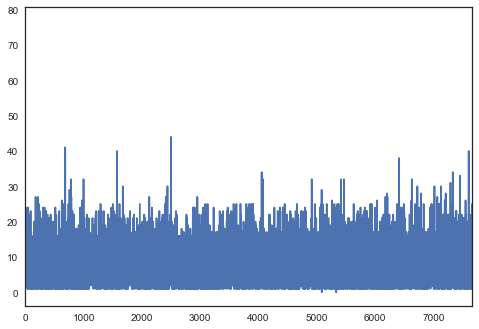

In [5]:
merge_df['floor'].plot()

In [6]:
imp  =  Imputer(missing_values='NaN' ,strategy='median' , axis=0)
merge_df[['life_sq','max_floor' , 'num_room','kitch_sq']] = imp.fit_transform(merge_df[['life_sq','max_floor' , 'num_room','kitch_sq']])

imp  =  Imputer(missing_values='NaN' ,strategy='median' , axis=0)

merge_df['floor'] = imp.fit_transform(merge_df['floor'].values.reshape(-1, 1))

In [8]:
#merge_df[imp_column].describe()

merge_df['build_year'][merge_df['build_year'] <= 1600]=2014

merge_df['build_year'][merge_df['build_year'] > 2050]=2014

merge_df['house_age'] = 2020  - merge_df['build_year']

imp_column.append('house_age')

In [9]:
imp  =  Imputer(missing_values='NaN' ,strategy='median' , axis=0)

merge_df['house_age'] = imp.fit_transform(merge_df['house_age'].values.reshape(-1, 1))

imp_column.remove('build_year')

In [11]:
merge_df[imp_column].describe()

,full_sq,life_sq,floor,max_floor,num_room,kitch_sq,state,material,house_age
count,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000
mean,54.111172,33.233918,7.664202,12.425117,1.925734,6.407443,2.044869,1.624944,32.780217
std,35.171162,42.635536,5.264775,5.830002,0.734818,23.862611,0.685225,1.340060,17.044378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,38.900000,22.000000,3.000000,9.000000,1.000000,5.000000,2.000000,1.000000,23.000000
50%,50.000000,30.000000,7.000000,12.000000,2.000000,6.000000,2.000000,1.000000,34.000000
75%,63.000000,38.000000,11.000000,17.000000,2.000000,8.000000,2.000000,1.000000,43.000000
max,5326.000000,7478.000000,77.000000,117.000000,19.000000,2014.000000,33.000000,6.000000,329.000000


In [12]:
merge_df['full_sq'][merge_df['full_sq']==0]= merge_df['full_sq'].median()
merge_df['max_floor'][merge_df['max_floor']==0]= merge_df['floor']

merge_df['life_sq_ratio']=merge_df['life_sq']/merge_df['full_sq']

imp_column.remove('life_sq')

imp_column.append('life_sq_ratio')

merge_df['floor_ratio']=merge_df['floor']/(merge_df['max_floor']+1)

imp_column.remove('floor')
imp_column.remove('max_floor')
imp_column.append('floor_ratio')

merge_df['kitch_sq_ratio']=merge_df['kitch_sq']/merge_df['full_sq']

imp_column.remove('kitch_sq')
imp_column.append('kitch_sq_ratio')

merge_df['log_full_sq']=np.log1p(merge_df['full_sq'])

imp_column.remove('full_sq')
imp_column.append('log_full_sq')
imp_column.append('id')

In [23]:
imp_column

['num_room',
 'state',
 'material',
 'house_age',
 'life_sq_ratio',
 'floor_ratio',
 'kitch_sq_ratio',
 'log_full_sq',
 'id']

In [24]:
#train_house_df = train_house_df.drop(train_house_df.index[train_house_df["full_sq"]>5000])
#train_house_df = train_house_df.drop(train_house_df.index[train_house_df["life_sq"]>200] )
#train_house_df = train_house_df.drop(train_house_df.index[train_house_df["floor"]>50])
#train_house_df = train_house_df.drop(train_house_df.index[train_house_df["max_floor"]>100] )
#train_house_df = train_house_df.drop(train_house_df.index[train_house_df["num_room"]>10] )
#train_house_df = train_house_df.drop(train_house_df.index[train_house_df["kitch_sq"]>100] )


print(len(train_house_df[train_house_df["floor"]>50]))
print(len(train_house_df[train_house_df["full_sq"]>300]))
print(len(train_house_df[train_house_df["life_sq"]>200]))
print(len(train_house_df[train_house_df["max_floor"]>100]))
print(len( train_house_df[train_house_df["num_room"]>10]))
print(len(train_house_df[train_house_df["kitch_sq"]>100]))

1
14
14
1
2
9


In [25]:
merge_df[imp_column].apply(lambda x: sum(x==0))

num_room            14
state                0
material             0
house_age            0
life_sq_ratio       49
floor_ratio          9
kitch_sq_ratio    1757
log_full_sq          0
id                   0
dtype: int64

In [26]:
merge_df.drop(['hospital_beds_raion' , 'cafe_sum_500_min_price_avg' , 'cafe_sum_500_max_price_avg' , 'cafe_avg_price_500'],inplace=True)

In [27]:
train_na = (merge_df.isnull().sum() / len(merge_df)) * 100
train_na[train_na.sort_values(ascending=False) > 40]
#train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False).

#merge_df.drop(['' , ''] , inplace=True)

hospital_beds_raion           46.833451
cafe_sum_500_min_price_avg    43.112265
cafe_sum_500_max_price_avg    43.112265
cafe_avg_price_500            43.112265
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


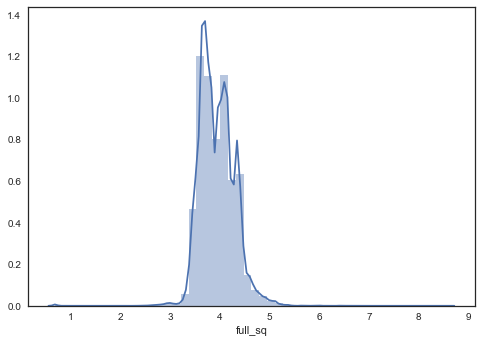

In [28]:
sns.distplot(np.log1p(merge_df['full_sq']))

In [29]:
merge_df.shape

(38133, 296)

In [30]:
label_df.shape

(30471,)

In [31]:
macro_cat_columns  = macro_df.select_dtypes(exclude=['float64' , 'int64']).columns

macro_num_columns  = macro_df.select_dtypes(include=['float64' , 'int64']).columns

from sklearn.preprocessing import Imputer

imp  =  Imputer(missing_values='NaN' ,strategy='median' , axis=0)

macro_df[macro_num_columns] = imp.fit_transform(macro_df[macro_num_columns])

In [33]:
remove_column=['full_sq' , 'life_sq' , 'floor' , 'max_floor' , 'num_room' , 'kitch_sq' , 'state' , 'build_year' , 'material']
other_column =  feature_df.columns.drop(remove_column)

cat_columns  = merge_df[other_column].select_dtypes(exclude=['float64' , 'int64']).columns

num_columns  = merge_df[other_column].select_dtypes(include=['float64' , 'int64']).columns

In [34]:
macro_num_columns_required=['oil_urals', 'balance_trade', 'balance_trade_growth', 'eurrub',
       'net_capital_export', 'micex_rgbi_tr', 'micex_cbi_tr', 'deposits_rate',
       'mortgage_value', 'rent_price_3room_bus', 'power_clinics',
       'seats_theather_rfmin_per_100000_cap']

imp  =  Imputer(missing_values='NaN' ,strategy='median' , axis=0)

merge_df[num_columns] = imp.fit_transform(merge_df[num_columns])

merge_df['product_type'][merge_df['product_type'].isnull()]='Investment'

macro_df['child_on_acc_pre_school'][macro_df['child_on_acc_pre_school']=='#!']='18,200'

macro_df['child_on_acc_pre_school'][macro_df['child_on_acc_pre_school'].isnull()]='18,200'

macro_df['modern_education_share'][macro_df['modern_education_share'].isnull()]='93,17'

macro_df['old_education_build_share'][macro_df['old_education_build_share'].isnull()]='18,95'

In [39]:
num_columns_required = ['green_part_500', 'prom_part_500', 'office_sqm_500', 'trc_count_500',
       'trc_sqm_500', 'cafe_sum_500_min_price_avg',
       'cafe_count_500_price_1000', 'cafe_count_500_price_4000',
       'cafe_count_500_price_high', 'mosque_count_500', 'leisure_count_500',
       'sport_count_500', 'market_count_500', 'prom_part_1000',
       'office_sqm_1000', 'cafe_sum_1000_min_price_avg',
       'cafe_count_1000_price_high', 'mosque_count_1000', 'market_count_1000',
       'trc_sqm_1500', 'cafe_sum_1500_min_price_avg', 'mosque_count_1500',
       'cafe_sum_2000_min_price_avg', 'mosque_count_2000', 'market_count_2000',
       'mosque_count_3000', 'prom_part_5000', 'mosque_count_5000', 'female_f',
       '7_14_female', 'build_count_1971-1995', 'green_zone_km',
       'water_treatment_km', 'water_km', 'big_road1_km', 'railroad_km',
       'fitness_km', 'additional_education_km', 'church_synagogue_km',
       'catering_km']

In [103]:

main_merge_df  =  merge_df[imp_column]

main_merge_df[cat_columns] = merge_df[cat_columns]

main_merge_df[num_columns] = merge_df[num_columns]
#main_merge_df[num_columns_required] = merge_df[num_columns_required]

In [104]:
main_merge_df.shape

(38133, 290)

In [105]:
#macro_col_required=macro_num_columns_required+['child_on_acc_pre_school' , 'modern_education_share' , 'old_education_build_share']
macro_col_required=macro_num_columns_required+macro_cat_columns.tolist()


merge_macro_df = pd.merge(main_merge_df, macro_df[macro_col_required], on='timestamp') 

In [44]:
merge_macro_df.columns[merge_macro_df.apply(lambda x: sum(x.isnull()) ) > 0]

Index([], dtype='object')

In [94]:
main_merge_df.columns[main_merge_df.apply(lambda x: sum(x.isnull()) ) > 0]

Index([], dtype='object')

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV

def modelFeatureSelection(name , alg, dtrain, dvalidation , dtest, predictors, target, IDcol, tuned_parameters,rmse, cvNo):
    #Fit the algorithm on the data
    
    #svc = SVC(kernel="linear")
    # The "accuracy" scoring is proportional to the number of correct
    # classifications
    rfecv = RFECV(estimator=alg, step=1, cv=cvNo,
                  scoring='neg_mean_squared_error')
    rfecv.fit(dtrain[predictors], dtrain[target])

    print("Optimal number of features : %d" % rfecv.n_features_)
    
    #print("Optimal number of features : %d" % rfecv.)

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()
    
    feat_imp = pd.Series(rfecv.feature_importances_, predictors).sort_values(ascending=False)
    feat_imp.head(50).plot(kind='bar', title='Feature Importances' ,figsize= (15,8)  )
    plt.ylabel('Feature Importance Score')
    

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV

def modelfitWithGridSearch(name , alg, dtrain, dvalidation , dtest, predictors, target, IDcol, tuned_parameters,rmse, cvNo):
    #Fit the algorithm on the data
    
    clf = GridSearchCV(alg, tuned_parameters, cv=cvNo, scoring='neg_mean_squared_error')
    
    clf.fit(dtrain[predictors], dtrain[target])
    
    print("Best parameters set found on development set:")
    print(clf.best_estimator_)
    
    print("Best Score"+str(clf.best_score_))
       
    #Predict training set:
    dtrain_predictions = clf.predict(dtrain[predictors])
    #print('predictors '+str(predictors))
        
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(np.expm1(dtrain[target].values), np.expm1(dtrain_predictions))))
  
   
    
    dvalidation_predictions = clf.predict(dvalidation[predictors])
    dvalidation.loc[:,'PRED_'+str(target)+'_'+str(name)] = np.expm1(dvalidation_predictions)
    print ("\nValidation Model Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(np.expm1(dvalidation[target].values), np.expm1(dvalidation_predictions))))
    
    dtest_predictions = clf.predict(dtest[predictors])
    dtest.loc[:,target] = np.expm1(dtest_predictions)
    #dtest['Item_Outlet_Sales'] = np.exp(dtest_predictions)
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x].astype(int) for x in IDcol})
    filename = name+".csv"
    submission.to_csv(filename, index=False)

In [49]:
import datetime
rmse_data = {'ALG':[] , 'CVD_Best_Score':[] , 'Train_RMSE':[] ,'Test_RMSE':[] }
rmse = pd.DataFrame(rmse_data)
index = 0

def best_fit_model_ensemble_regression(train_agency_df, validation_df,test_agency_df , target, IDcol,cvNo,index):
    #print("------------ Algorithm :- [Random Forest]----------------------------------")
    #print(datetime.datetime.now().time())
    index= index +1;
    #rmse.loc[index,'ALG']='Random Forest'
    #randomForestRegressor(train_agency_df,validation_df, test_agency_df , target, IDcol,rmse,cvNo)
    print("------------ Algorithm :- [Gradient Boosting Regression]----------------------------------")
    
    print(datetime.datetime.now().time())
    index= index +1;
    rmse.loc[index,'ALG']='Gradient Boosting'
    gradientBoostingRegressor(train_agency_df, validation_df,test_agency_df , target, IDcol,rmse,cvNo)

       #print("-!!!!!--Best RMSE--!!!!--"+rmse.sort_values('Test_RMSE').head(1))

    return rmse   

In [53]:
from sklearn.preprocessing import LabelEncoder

def createDummy(df , var_mod):
    le = LabelEncoder()
    #var_mod = ['PROD_ABBR','STATE_ABBR' ]
    le = LabelEncoder()
    for i in var_mod:
        df[i] = le.fit_transform(df[i])

    #One Hot Coding:
    #df = pd.get_dummies(df, columns=var_mod)
    return df

In [95]:
merge_macro_df.shape

(38133, 80)

In [108]:
from sklearn.feature_selection import RFECV

all_feature_columns = merge_macro_df.columns.tolist()

all_feature_columns.remove('timestamp')

rowid=merge_macro_df['id'] 

model_house_df = merge_macro_df[all_feature_columns]

In [101]:
model_house_df.describe()

,num_room,state,material,house_age,life_sq_ratio,floor_ratio,kitch_sq_ratio,log_full_sq,id,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_a

(38133, 304)
After Dummay Coding Shape(38133, 304)
(30471, 304)
(7662, 304)
(24376, 305)
(6095, 305)
Optimal number of features : 184


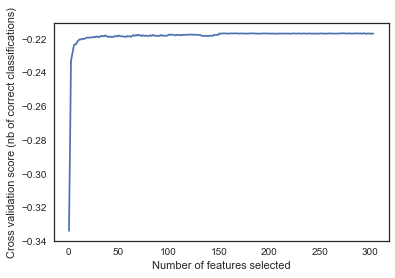


Model Report
RMSE : 2.717e+06
<bound method deprecated._decorate_fun.<locals>.wrapped of GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)>


In [117]:
model_house_df['id']=merge_macro_df['id']

cat_columns_model  = model_house_df.select_dtypes(exclude=['float64' , 'int64']).columns

num_columns_model = model_house_df.select_dtypes(include=['float64' , 'int64']).columns

model_house_df['product_type'][model_house_df['product_type'].isnull()]='Investment'
print(model_house_df.shape)

var_mod = cat_columns_model.tolist()
model_house_df = createDummy(model_house_df,var_mod)
print("After Dummay Coding Shape"+str(model_house_df.shape))

train_sequence = 30470
train_house_model_df  = model_house_df.loc[0:train_sequence]

print(train_house_model_df.shape)

train_house_model_df['price_doc'] = np.log1p(label_df.values)
test_model_df  = model_house_df.loc[(train_sequence+1):len(model_house_df)]

print(test_model_df.shape)

train_model_df, validation_model_df = train_test_split(train_house_model_df, train_size = 0.8)

print(train_model_df.shape)
print(validation_model_df.shape)
target = 'price_doc'
IDcol = ['id']
index=0
removeColumn =[ ]
predictors = [x for x in train_model_df.columns if x not in [target]+IDcol+removeColumn]

alg = GradientBoostingRegressor()

alg.fit(train_model_df[predictors], train_model_df[target])

rfecv = RFECV(estimator=alg, step=1, cv=2,
              scoring='neg_mean_squared_error')
rfecv.fit(train_model_df[predictors], train_model_df[target])

print("Optimal number of features : %d" % rfecv.n_features_)

#print("Optimal number of features : %d" % rfecv.)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#Predict training set:
dtrain_predictions = alg.predict(train_model_df[predictors])
#print('predictors '+str(predictors))

#Print model report:
print ("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(np.expm1(train_model_df[target].values), np.expm1(dtrain_predictions))))
print(alg.decision_function)

In [114]:
len(rfecv.grid_scores_) 

152

In [ ]:
metrics.

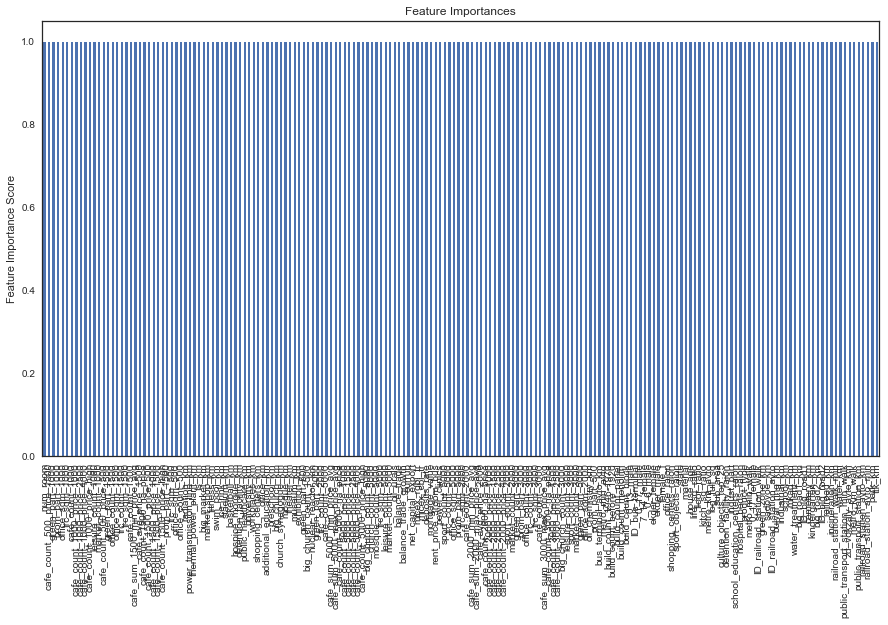

In [123]:
feat_imp = pd.Series(rfecv.ranking_, predictors).sort_values(ascending=True)
feat_imp.head(184).plot(kind='bar', title='Feature Importances' ,figsize= (15,8)  )
plt.ylabel('Feature Importance Score')

important_columns = pd.DataFrame(columns=['predictor','imp'] )
#important_columns

important_columns['imp'] = pd.Series(rfecv.ranking_, predictors)
important_columns['predictor'] = predictors

selected_columns = important_columns.loc[important_columns['imp'].sort_values(ascending=True).index]['predictor'].head(184).tolist()
#selected_columns

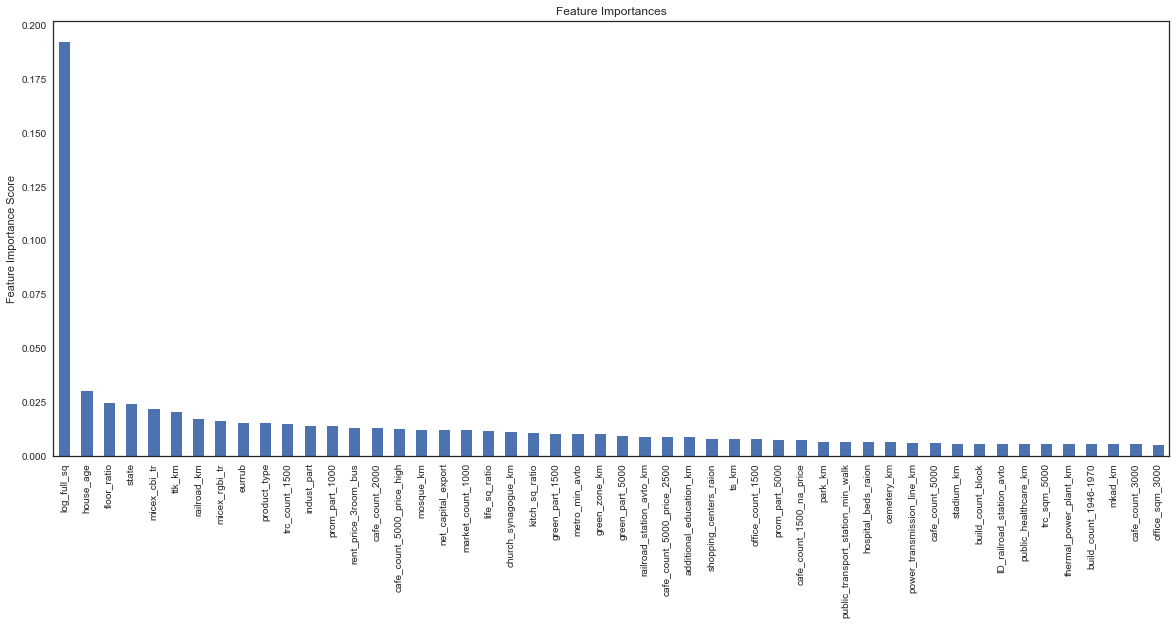

In [129]:
feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.head(50).plot(kind='bar', title='Feature Importances' ,figsize= (20,8)  )
plt.ylabel('Feature Importance Score')

In [148]:
feat_imp.index[0]

'log_full_sq'

In [172]:
feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)

selected_alg_columns = feat_imp.index[0:70].tolist()
#selected_columns

In [169]:
selected_alg_columns

['log_full_sq',
 'house_age',
 'floor_ratio',
 'state',
 'micex_cbi_tr',
 'ttk_km',
 'railroad_km',
 'micex_rgbi_tr',
 'eurrub',
 'product_type',
 'trc_count_1500',
 'indust_part',
 'prom_part_1000',
 'rent_price_3room_bus',
 'cafe_count_2000',
 'cafe_count_5000_price_high',
 'mosque_km',
 'net_capital_export',
 'market_count_1000',
 'life_sq_ratio',
 'church_synagogue_km',
 'kitch_sq_ratio',
 'green_part_1500',
 'metro_min_avto',
 'green_zone_km',
 'green_part_5000',
 'railroad_station_avto_km',
 'cafe_count_5000_price_2500',
 'additional_education_km',
 'shopping_centers_raion',
 'ts_km',
 'office_count_1500',
 'prom_part_5000',
 'cafe_count_1500_na_price',
 'park_km',
 'public_transport_station_min_walk',
 'hospital_beds_raion',
 'cemetery_km',
 'power_transmission_line_km',
 'cafe_count_5000',
 'stadium_km',
 'build_count_block',
 'ID_railroad_station_avto',
 'public_healthcare_km',
 'trc_sqm_5000',
 'thermal_power_plant_km',
 'build_count_1946-1970',
 'mkad_km',
 'cafe_count_3000'

In [173]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

    
def randomForestRegressor(train_agency_df,validation_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =['NB_WRTN_PREM_AMT','POLY_INFORCE_QTY']
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]

    param_grid = {"criterion": ["mse"],
                  "n_estimators":[100],
                  "oob_score":["True"],
                  #"max_depth":[10,15,20],
                  #"min_samples_split":[5],
                   "max_features" : ["auto"]
                  }
    if (cvNo!=0) :
        alg3 = RandomForestRegressor()
        modelfitWithGridSearch("RandomForest",alg3, train_agency_df, validation_agency_df,test_agency_df , predictors, target, IDcol,param_grid,rmse,cvNo)   
    else:
        alg3 = RandomForestRegressor(n_estimators=100 , oob_score=True )
        executeModel("RandomForest",alg3, train_agency_df,validation_agency_df, test_agency_df , predictors, target, IDcol,rmse) 
    
def gradientBoostingRegressor(train_agency_df,validation_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =[ ]
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]

    param_grid = { 
                   "loss" :["ls"],
                 # "alpha": [0.5,  0.9, 1.5],
                  "min_samples_split": [10],
                  "max_depth":[15],
                  "n_estimators":[300], 
                 # 'min_samples_leaf': [5]
                  }

   
    
    if (cvNo!=0) :
        alg3 = GradientBoostingRegressor()
        #modelFeatureSelection("GBM",alg3, train_agency_df,validation_agency_df, test_agency_df , predictors, target, IDcol,param_grid,rmse,5)
        #alg4 = GradientBoostingRegressor(max_features=35)
        modelfitWithGridSearch("GBM",alg3, train_agency_df,validation_agency_df, test_agency_df , predictors, target, IDcol,param_grid,rmse,cvNo)
    else:
        alg3 = GradientBoostingRegressor()
        executeModel("GBM",alg3, train_agency_df,validation_agency_df, test_agency_df , predictors, target, IDcol,rmse) 

In [174]:
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
import datetime

all_feature_columns = merge_macro_df.columns.tolist()

all_feature_columns.remove('timestamp')

rowid=merge_macro_df['id'] 

model_house_df = merge_macro_df[selected_alg_columns]

model_house_df['id']=merge_macro_df['id']

cat_columns_model  = model_house_df.select_dtypes(exclude=['float64' , 'int64']).columns

num_columns_model = model_house_df.select_dtypes(include=['float64' , 'int64']).columns

model_house_df['product_type'][model_house_df['product_type'].isnull()]='Investment'
print(model_house_df.shape)

var_mod = cat_columns_model.tolist()
model_house_df = createDummy(model_house_df,var_mod)
print("After Dummay Coding Shape"+str(model_house_df.shape))

train_sequence = 30470
train_house_model_df  = model_house_df.loc[0:train_sequence]
train_house_model_df['price_doc'] = np.log1p(label_df.values)
test_model_df  = model_house_df.loc[(train_sequence+1):len(model_house_df)]
train_model_df, validation_model_df = train_test_split(train_house_model_df, train_size = 0.8)



print('--Model Start----')
print(datetime.datetime.now().time())
target = 'price_doc'
IDcol = ['id']
index=0
rmse  = best_fit_model_ensemble_regression(train_model_df,validation_model_df, test_model_df, target, IDcol, 5,index)
print('--Model End----')
print(datetime.datetime.now().time())


(38133, 71)
After Dummay Coding Shape(38133, 71)
--Model Start----
19:22:58.269363
------------ Algorithm :- [Gradient Boosting Regression]----------------------------------
19:22:58.269363


KeyboardInterrupt: 

In [163]:
validation_model_df['orig_price_doc'] = np.expm1(validation_model_df['price_doc'])

validation_model_df[['price_doc','orig_price_doc','PRED_price_doc_GBM']].describe()

,price_doc,orig_price_doc,PRED_price_doc_GBM
count,6095.000000,6.095000e+03,6.095000e+03
mean,15.596587,7.037523e+06,6.511902e+06
std,0.611203,4.655202e+06,3.587268e+06
min,12.711278,3.314640e+05,8.175812e+05
25%,15.363073,4.700000e+06,4.542313e+06
50%,15.648092,6.250000e+06,5.725941e+06
75%,15.931465,8.297500e+06,7.315370e+06
max,18.370676,9.512250e+07,4.632552e+07


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


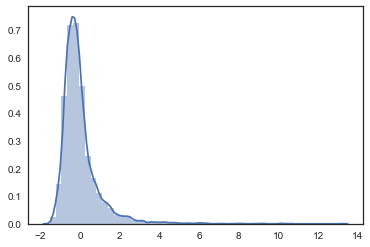

In [158]:
from sklearn.preprocessing import scale
sns.distplot(scale(validation_model_df[['PRED_price_doc_GBM']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


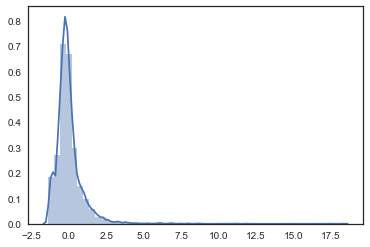

In [159]:
from sklearn.preprocessing import scale
sns.distplot(scale(validation_model_df[['orig_price_doc']]))

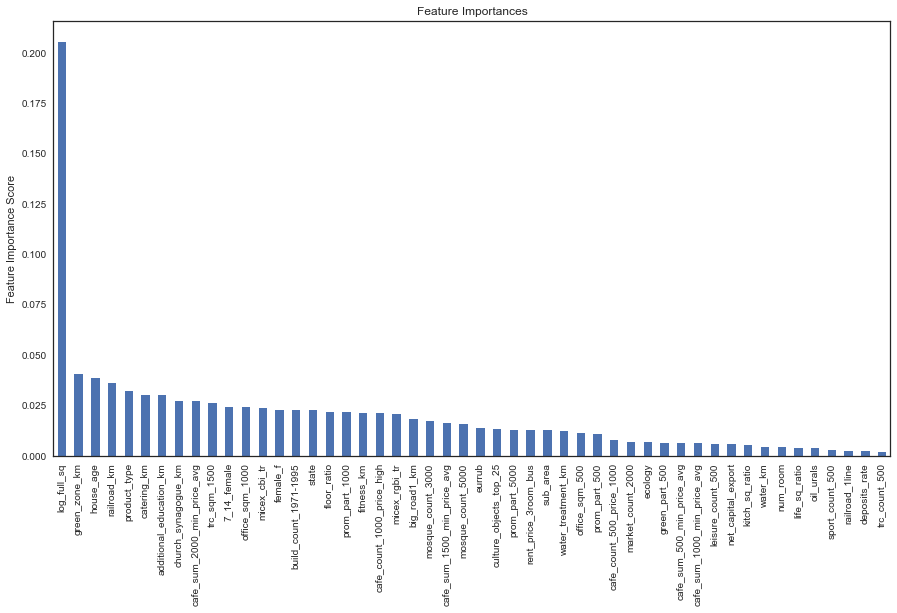

In [90]:
feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.head(50).plot(kind='bar', title='Feature Importances' ,figsize= (15,8)  )
plt.ylabel('Feature Importance Score')
        
    

{'boxes': [<matplotlib.lines.Line2D at 0x168c1771550>,
 'caps': [<matplotlib.lines.Line2D at 0x168c177afd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x168c1789940>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x168c1783a58>,
 'whiskers': [<matplotlib.lines.Line2D at 0x168c1771ef0>,
  <matplotlib.lines.Line2D at 0x168c1793be0>]}

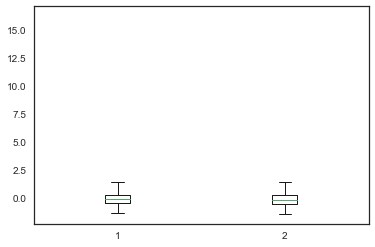

In [81]:
plt.boxplot(scale(validation_model_df[['orig_price_doc','PRED_price_doc_GBM']]))

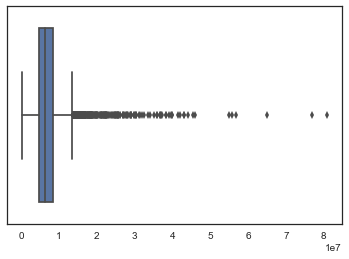

In [87]:
ax = sns.boxplot(x=['orig_price_doc'], data=validation_model_df)

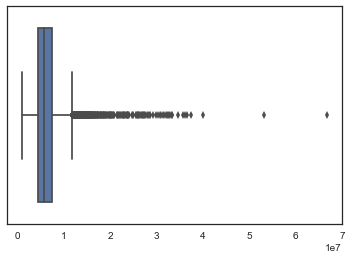

In [88]:
ax = sns.boxplot(x=['PRED_price_doc_GBM'], data=validation_model_df)

In [ ]:
validation_model_df[['orig_price_doc','id']].plot.scatter(x='id', y='orig_price_doc')

In [ ]:
validation_model_df[['PRED_price_doc_GBM','id']].plot.scatter(x='id', y='PRED_price_doc_GBM')

In [164]:
validation_model_df['diff'] = validation_model_df['PRED_price_doc_GBM'] - validation_model_df['orig_price_doc']

In [168]:
len(validation_model_df['diff'].unique())

6095

In [ ]:
validation_model_df[['diff','id']].plot.scatter(x='id', y='diff')

In [ ]:
validation_model_df[np.absolute(validation_model_df['diff']) <= 2821138]

In [ ]:
validation_model_df['diff'].plot.hist(bins=50)

In [ ]:
rfecv.n_features_

In [ ]:
predictors

In [ ]:
selected_columns = important_columns.loc[important_columns['imp'].sort_values(ascending=False).index]['predictor'].head(50).tolist()
selected_columns

In [ ]:
important_columns = pd.DataFrame(columns=['imp','predictor'] )
important_columns

important_columns['imp'] = alg.feature_importances_
#[alg.feature_importances_, predictors] 

In [ ]:
important_columns['predictor'] = predictors

In [ ]:
selected_columns = important_columns.loc[important_columns['imp'].sort_values(ascending=False).index]['predictor'].head(50).tolist()
selected_columns

In [ ]:
pca_reduced_df.head()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt 

def executeModel(name , alg, dtrain, dvalidation , dtest, predictors, target, IDcol,rmse):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[predictors], dtrain[target])
    
    print(alg.feature_importances_)
          

    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #print('predictors '+str(predictors))
        
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    #print(alg.estimators_ )  
   
    
    dvalidation_predictions = alg.predict(dvalidation[predictors])
    dvalidation.loc[:,'PRED_'+str(target)+'_'+str(name)] = dvalidation_predictions
    print ("\nValidation Model Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dvalidation[target].values, dvalidation_predictions)))
    
    print(len(rmse['ALG']))
    rmse.loc[len(rmse['ALG'])-1,'Train_RMSE'] =np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    rmse.loc[len(rmse['ALG'])-1,'Test_RMSE']  =np.sqrt(metrics.mean_squared_error(dvalidation[target].values, dvalidation_predictions))
    
    
    #dvalidation[[target,'PRED_'+str(target)]].plot.area(figsize=(10,6) , stacked=False )

    dtest_predictions = alg.predict(dtest[predictors])
    dtest.loc[:,target] = dtest_predictions
    #dtest['Item_Outlet_Sales'] = np.exp(dtest_predictions)
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x].astype(int) for x in IDcol})
    filename = name+".csv"
    submission.to_csv(filename, index=False)

In [ ]:
train_house_df['price_doc'].describe()

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(test_pca_df.price_doc.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(train_pca_df.price_doc.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()